# Customer Churn Prediction in the Telecom Industry by Handling Class Imbalance

Author: Sami Ullah

**About Data Set**

**Kaggle Dataset** -->> https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

1.  **gender:** Gender of the customer (e.g., Male, Female).

2.   **SeniorCitizen:** Indicates if the customer is a senior citizen (e.g., 1: Yes, 0: No).
  
3.  **Partner:** Whether the customer has a partner (Yes/No).
    
4.  **Dependents:** Whether the customer has dependents (Yes/No).

5.  **tenure:** Number of months the customer has stayed with the company.

6.  **PhoneService**: Whether the customer has a phone service (Yes/No).

7.   **MultipleLines**: Whether the customer has multiple phone lines (Yes/No/No phone service).


8.  **Contract:** Type of contract the customer has (e.g., Month-to-month, One year, Two year).


9.  **PaymentMethod:** Payment method used by the customer (e.g., Electronic check, Mailed check, Bank transfer, Credit card).


10.  **TotalCharges:** Total amount charged to the customer.

11.  **Churn:** Whether the customer has churned (Yes/No).

**Import Necessory Libraries**

In [1]:
# ===============================
# Importing Libraries
# ===============================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
    recall_score,
    f1_score,
    roc_auc_score
)

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost import XGBClassifier

# Warnings and OS
import warnings
import os

warnings.filterwarnings('ignore')

**Load DataSet**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Size Of DataSet
df.shape

(7043, 21)

Show Top 5 Rows

In [4]:
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# **Keeping Important Columns**

In [5]:
df = df[["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService","MultipleLines","Contract","TotalCharges","Churn"]]

In [6]:
# Columns in dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'Contract', 'TotalCharges', 'Churn'],
      dtype='object')

**Information and Statistical Analysis**

In [7]:
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
 4   tenure         7043 non-null   int64 
 5   PhoneService   7043 non-null   object
 6   MultipleLines  7043 non-null   object
 7   Contract       7043 non-null   object
 8   TotalCharges   7043 non-null   object
 9   Churn          7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB
None

       SeniorCitizen       tenure
count    7043.000000  7043.000000
mean        0.162147    32.371149
std         0.368612    24.559481
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000


**Check missing and duplicated rows**

In [8]:
print("Total Missing Rows --->>>  " , df.isnull().sum().sum())
print("Total duplicated Rows --->>>  " , df.duplicated().sum())

Total Missing Rows --->>>   0
Total duplicated Rows --->>>   57


**Exploration of Unique Values in Dataset Features**

In [9]:
for i in df.columns:
    print("Feature -->> ", i)
    print(f"Number of UNIQUE values in {i} columns -- >> [{df[i].nunique()}]")
    print(f"UNIQUE values in {i} columns -- >> [{df[i].unique()}]")
    print("--"*20)

Feature -->>  gender
Number of UNIQUE values in gender columns -- >> [2]
UNIQUE values in gender columns -- >> [['Female' 'Male']]
----------------------------------------
Feature -->>  SeniorCitizen
Number of UNIQUE values in SeniorCitizen columns -- >> [2]
UNIQUE values in SeniorCitizen columns -- >> [[0 1]]
----------------------------------------
Feature -->>  Partner
Number of UNIQUE values in Partner columns -- >> [2]
UNIQUE values in Partner columns -- >> [['Yes' 'No']]
----------------------------------------
Feature -->>  Dependents
Number of UNIQUE values in Dependents columns -- >> [2]
UNIQUE values in Dependents columns -- >> [['No' 'Yes']]
----------------------------------------
Feature -->>  tenure
Number of UNIQUE values in tenure columns -- >> [73]
UNIQUE values in tenure columns -- >> [[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14

**Value Counts for Categorical Features**

In [10]:
cat_features = df.select_dtypes(exclude='number')

for i in cat_features.columns:
    print("feature -->> " , i)
    print(cat_features[i].value_counts())
    print("=="*20)

feature -->>  gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
feature -->>  Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
feature -->>  Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
feature -->>  PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
feature -->>  MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
feature -->>  Contract
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
feature -->>  TotalCharges
TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64
feature -->>  Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64


**TotalCharges**

Steps :

* Convert TotalCharges to a numeric type
* Handle Missing Value
  

In [11]:
df["TotalCharges"].value_counts().iloc[:10]

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
19.65,8
45.3,7
19.55,7
20.15,6


Missing Values -->>  11
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


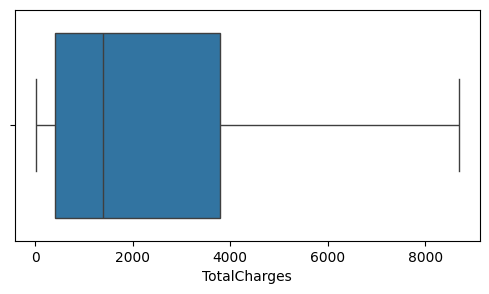

Missing Values after filling -->>  0


In [12]:
# Convert 'TotalCharges' to numeric, coercing errors into NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Check and print the number of missing values
print("Missing Values -->> ", df["TotalCharges"].isnull().sum())

# Print summary statistics
print(df["TotalCharges"].describe())

# Boxplot to visualize the distribution and potential outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["TotalCharges"])
plt.show()

# Fill missing values with the median of the 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Optionally, print the number of missing values again to confirm it's filled
print("Missing Values after filling -->> ", df["TotalCharges"].isnull().sum())

**Distribution of Categorical Features**

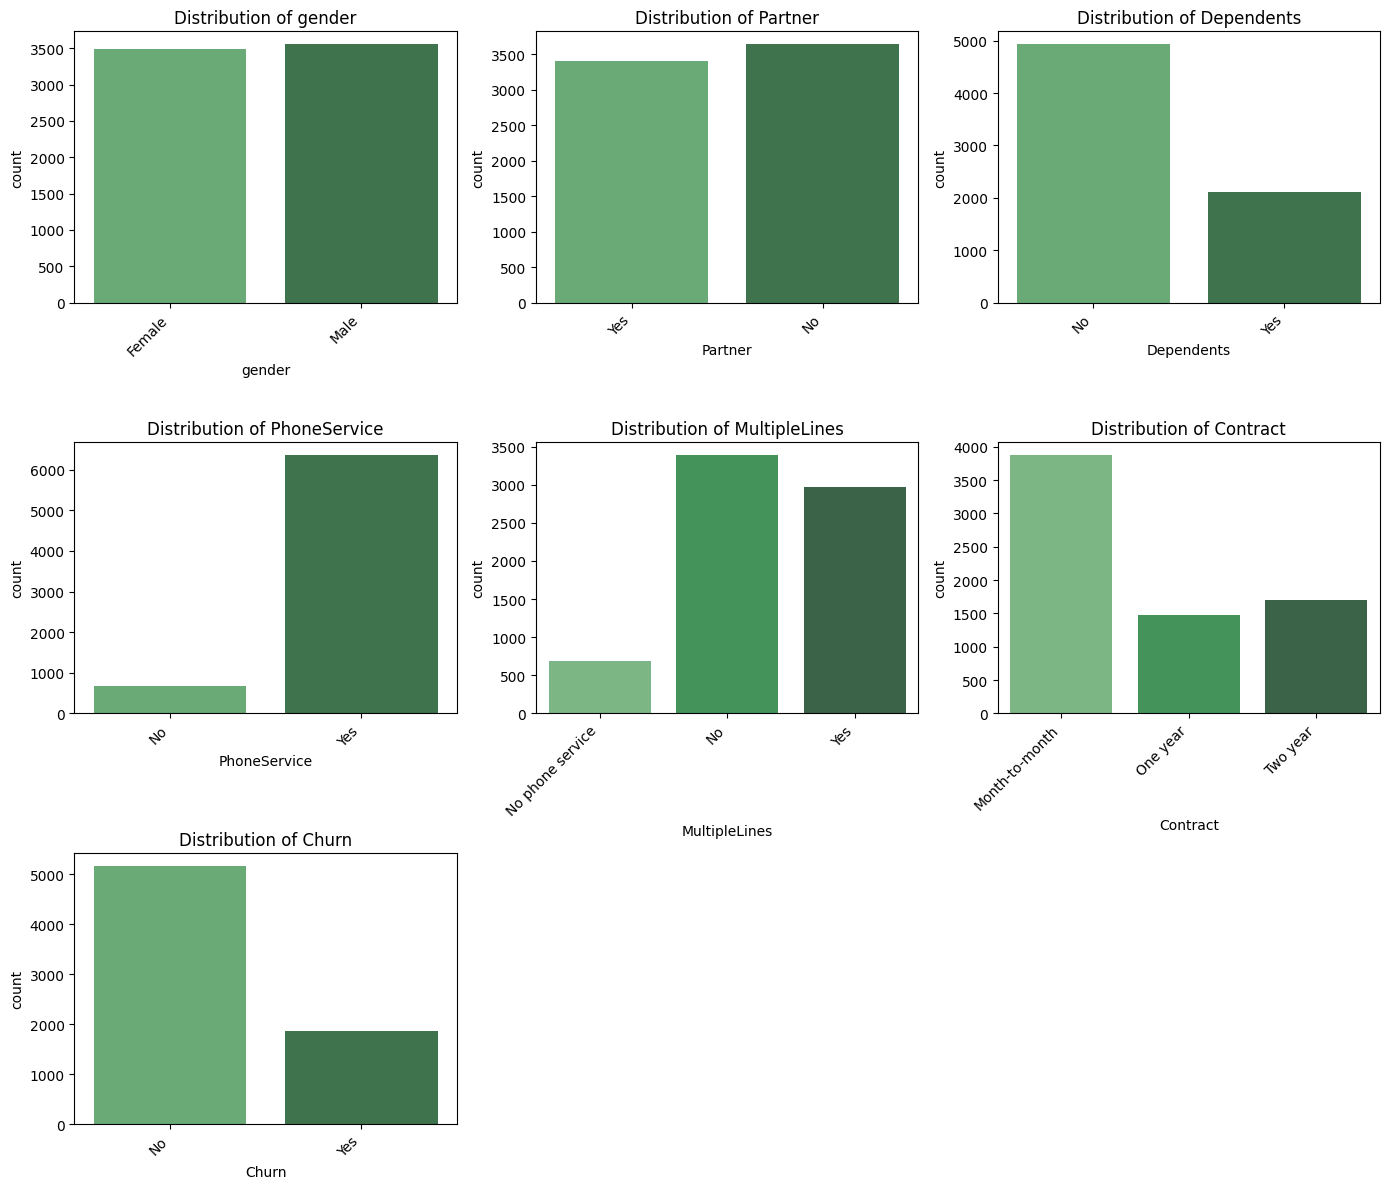

In [13]:
cat_features = df.select_dtypes(exclude='number')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
ax = ax.flatten()

# Loop through categorical features and plot distribution
for i, feature in enumerate(cat_features.columns):
    sns.countplot(x=cat_features[feature], ax=ax[i], palette='Greens_d')
    ax[i].set_title(f"Distribution of {feature}")

    # Add x-ticks (optional: rotate for better readability if needed)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")

for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()


**Visualization of Categorical Feature Distributions with Churn**

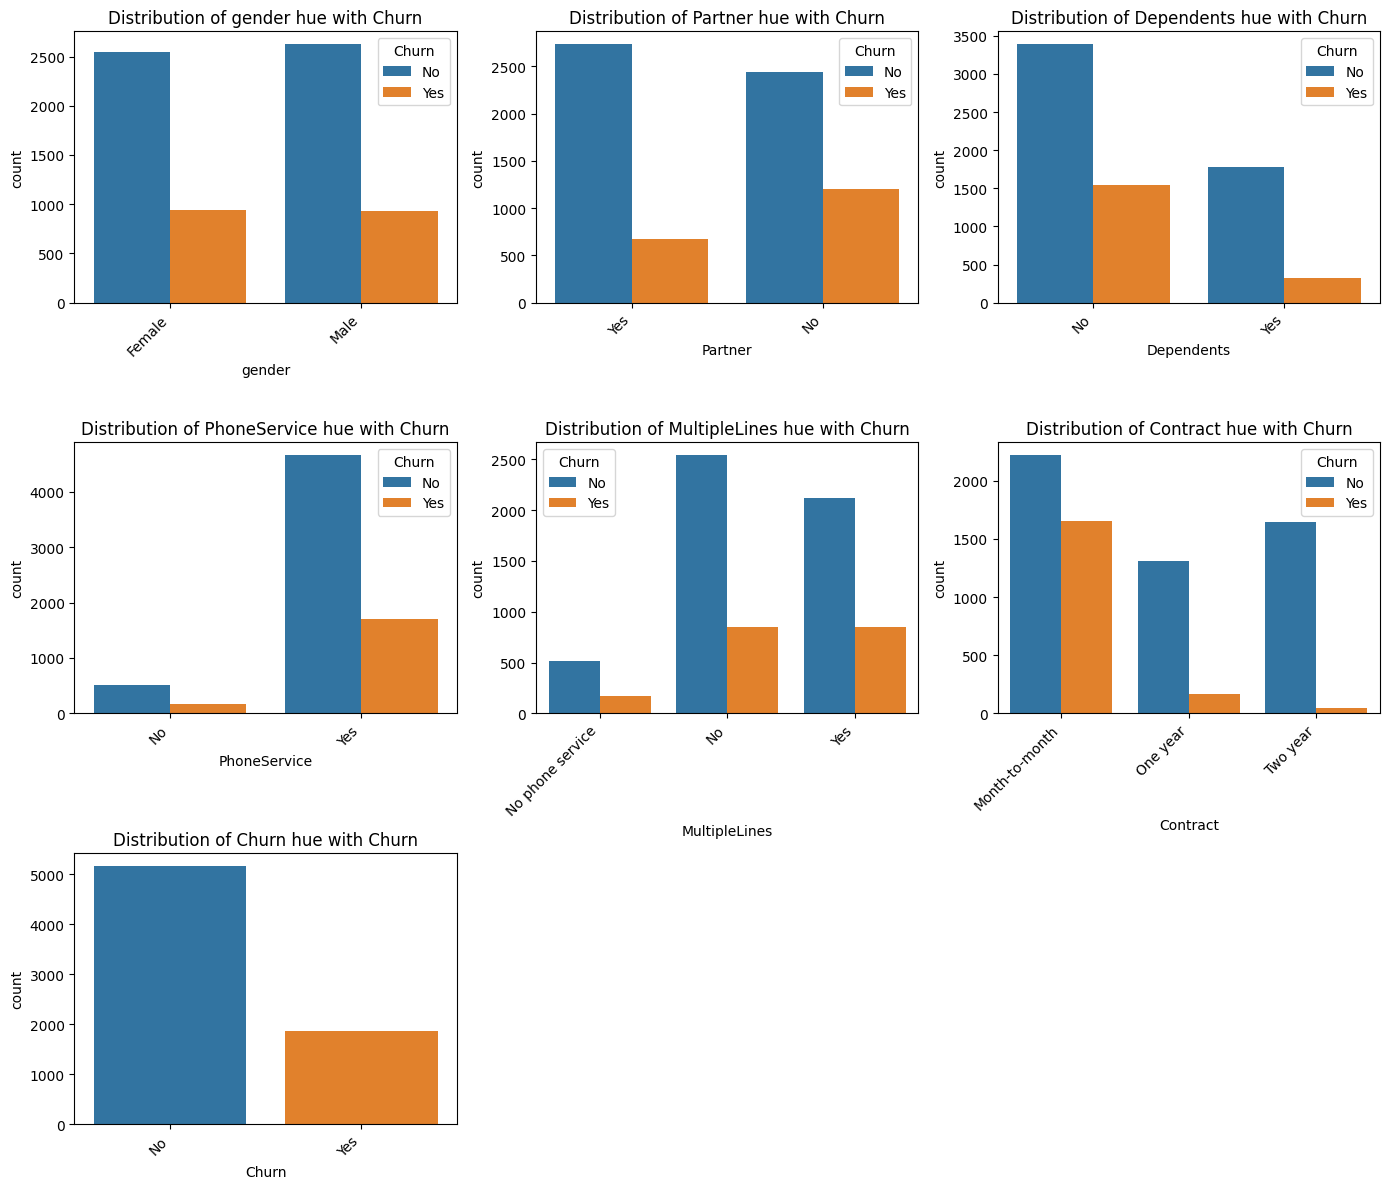

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
ax = ax.flatten()

# Loop through categorical features and plot distribution
for i, feature in enumerate(cat_features.columns):
    sns.countplot(x=cat_features[feature], hue=cat_features["Churn"], ax=ax[i])
    ax[i].set_title(f"Distribution of {feature} hue with Churn")

    # Add x-ticks (optional: rotate for better readability if needed)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")

for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()


**Distribution of Numerical Features**

In [15]:
num_features = df.select_dtypes(include='number')
num_features.columns

Index(['SeniorCitizen', 'tenure', 'TotalCharges'], dtype='object')

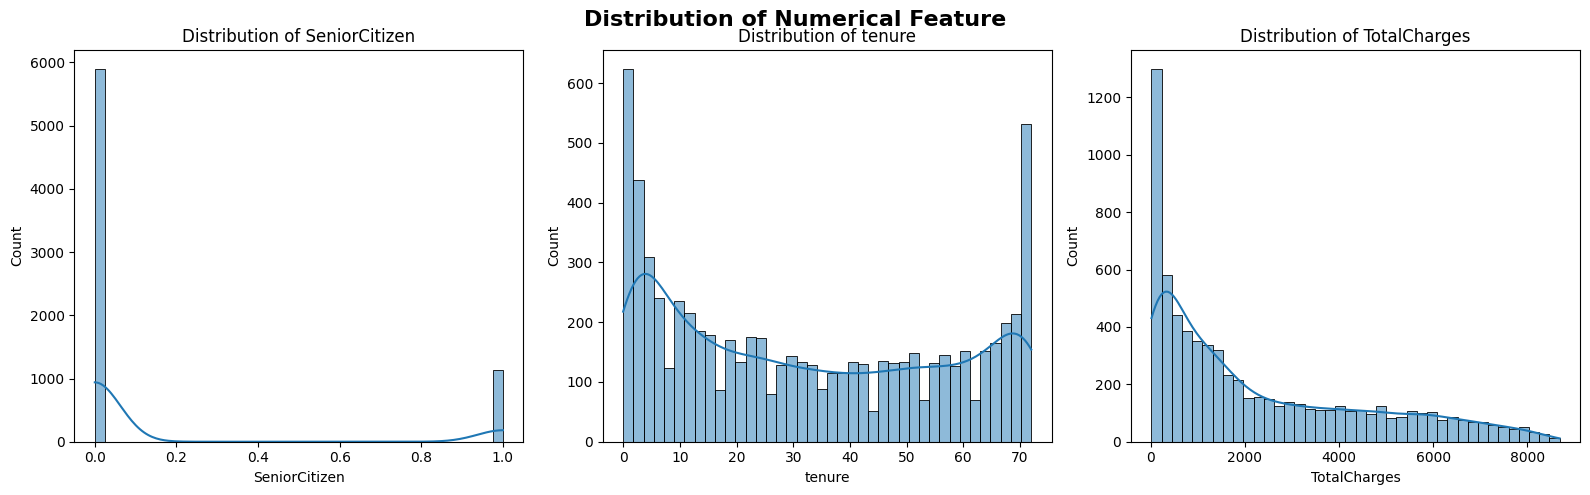

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax = ax.flatten()

# Loop through numerical features and plot distribution with Churn as hue
for i, feature in enumerate(num_features.columns):
    sns.histplot(data=num_features, x=feature, ax=ax[i], kde=True,bins=40)
    ax[i].set_title(f"Distribution of {feature}")



plt.suptitle("Distribution of Numerical Feature", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


**Distribution of Numerical Features with Churn Status**

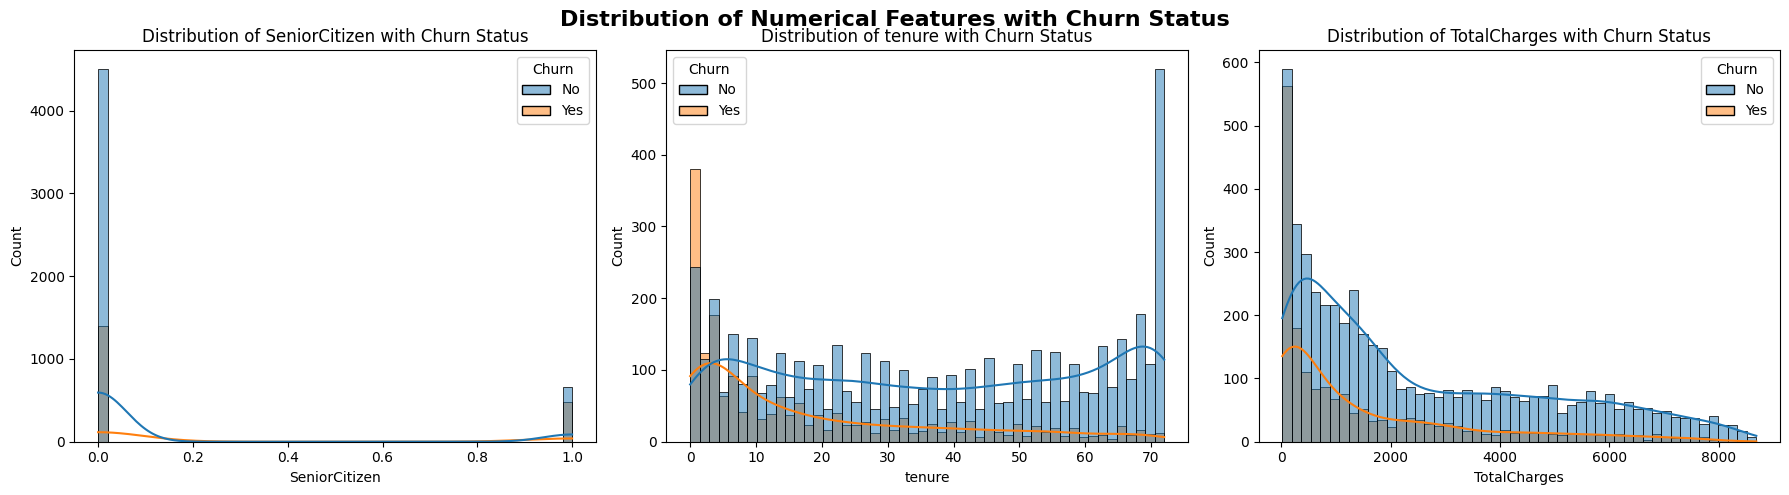

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax = ax.flatten()

# Loop through numerical features and plot distribution with Churn as hue
for i, feature in enumerate(num_features.columns):
    sns.histplot(data=num_features, x=feature, ax=ax[i],hue=df["Churn"], kde=True,bins=50)
    ax[i].set_title(f"Distribution of {feature} with Churn Status")

# Adjust layout for better spacing
plt.suptitle("Distribution of Numerical Features with Churn Status", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position to avoid overlap
plt.show()


**Feature imp using corr**

In [18]:
numfeature = df.select_dtypes("number")

corr_metrix = numfeature.corr()
corr_metrix

,SeniorCitizen,tenure,TotalCharges
SeniorCitizen,1.000000,0.016567,0.102652
tenure,0.016567,1.000000,0.825464
TotalCharges,0.102652,0.825464,1.000000


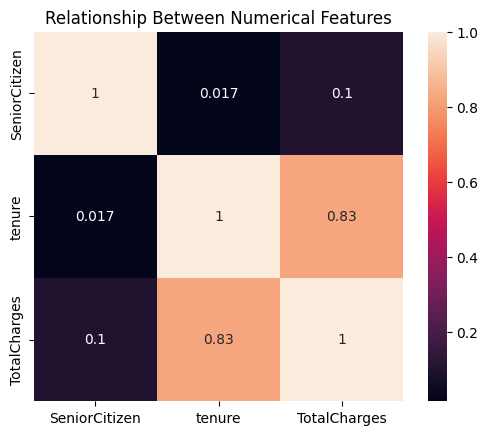

In [19]:
sns.heatmap(corr_metrix,annot=True,square = True)
plt.title("Relationship Between Numerical Features")
plt.show()

**This matrix represents the correlation coefficients between numerical columns in a dataset, likely calculated using Pearson's correlation. The values range from -1 to 1, where:**

*  1 indicates a perfect positive correlation.
*  0 indicates no correlation.
*  -1 indicates a perfect negative correlation.

**Observations:**

1. **SeniorCitizen vs. tenure** (0.016567): Almost no correlation between being a senior citizen and tenure.


2. **SeniorCitizen vs. TotalCharges** (0.102652): Weak positive correlation.


3. **tenure vs. TotalCharges** (0.825464): Strong positive correlation; the longer a customer stays, the more they are charged in total.


**tenure vs TotalCharges**

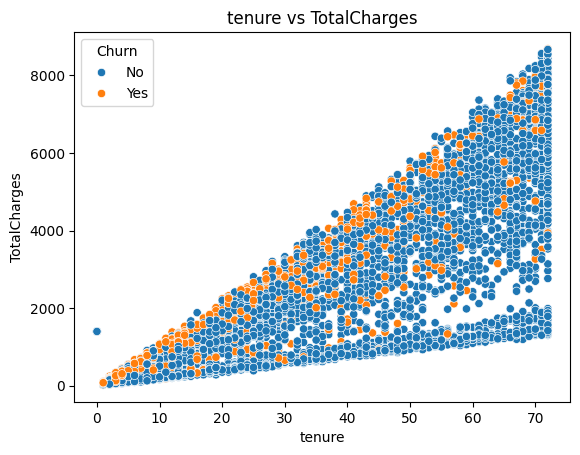

In [20]:
sns.scatterplot(x=df["tenure"],y=df["TotalCharges"], hue=df["Churn"])
plt.title("tenure vs TotalCharges")
plt.show()

**Save Clean Data in csv**

In [21]:
# df.to_csv("Clean_data.csv")

**Seperating Dependent and Independent Variables**

In [22]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X.shape, y.shape

((7043, 9), (7043,))

**Splitting Data into Training and Test Sets**

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

print("Size of x_train -- >> " , x_train.shape)
print("Size of x_test -- >> " , x_test.shape)
print("Size of y_train -- >> " , y_train.shape)
print("Size of y_test -- >> " , y_test.shape)

Size of x_train -- >>  (5634, 9)
Size of x_test -- >>  (1409, 9)
Size of y_train -- >>  (5634,)
Size of y_test -- >>  (1409,)


**Label Encoding of Target Variable**

In [24]:
# {'NO':0 , 'yes':1}
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [25]:
train_obj = x_train.select_dtypes(include="object")
test_obj = x_test.select_dtypes(include="object")

**One-Hot Encoding for Training and Testing Data**

In [26]:
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype = np.int32)

train_ohe = ohe.fit_transform(train_obj)
test_ohe = ohe.transform(test_obj)

train_columns = ohe.get_feature_names_out(train_obj.columns)

ohe_train = pd.DataFrame(data=train_ohe, columns=train_columns)
ohe_test = pd.DataFrame(data=test_ohe, columns=train_columns)
ohe_train.shape , ohe_test.shape
ohe_train.head(2)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year
0,0,0,1,1,0,0,1,0
1,0,0,0,1,0,1,0,1


In [27]:
train_numfeature = x_train.select_dtypes("number")
test_numfeature = x_test.select_dtypes("number")

**Standardization of Numerical Features Using StandardScaler**

In [28]:
scaler = StandardScaler()
train_scale = scaler.fit_transform(train_numfeature)
test_scale = scaler.transform(test_numfeature)

scaler_train = pd.DataFrame(data=train_scale, columns=train_numfeature.columns)
scaler_test = pd.DataFrame(data=test_scale, columns=train_numfeature.columns)

scaler_train.shape , scaler_test.shape
scaler_train.head(2)

,SeniorCitizen,tenure,TotalCharges
0,-0.437749,-0.465683,-0.421345
1,-0.437749,0.885537,1.255888


**Combining Encoded and Scaled Features for Model Input**

In [29]:
x_train = pd.concat([ohe_train,scaler_train],axis=1)
x_test = pd.concat([ohe_test,scaler_test],axis=1)
# Size
x_train.shape , x_test.shape
x_train.head(2)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,SeniorCitizen,tenure,TotalCharges
0,0,0,1,1,0,0,1,0,-0.437749,-0.465683,-0.421345
1,0,0,0,1,0,1,0,1,-0.437749,0.885537,1.255888


**Feature Importance**

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
selection  = ExtraTreesRegressor()
selection .fit(x_train,y_train)

selection.feature_importances_

array([0.04166386, 0.03776655, 0.02774621, 0.00664913, 0.00654487,
       0.01992867, 0.06702332, 0.07995844, 0.01769313, 0.24716003,
       0.44786578])

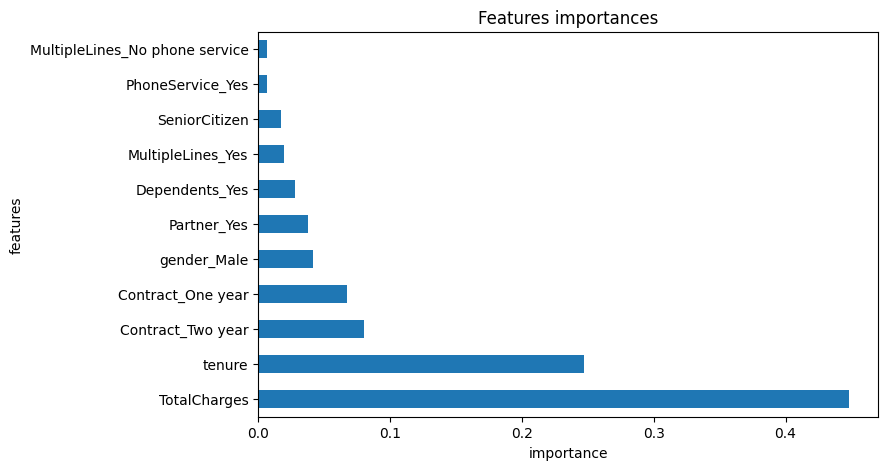

In [31]:
plt.figure(figsize=(8,5))
feature_importance = pd.Series(selection.feature_importances_, index=x_train.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.title("Features importances")
plt.ylabel('features')
plt.xlabel('importance')
plt.show()

**Balancing the Dataset Using SMOTE for Oversampling**

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train =smote.fit_resample(x_train, y_train)
x_train.shape , y_train.shape

((8276, 11), (8276,))

**Model Training**

In [33]:
model_lr = LogisticRegression()
model_gnb = GaussianNB()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_ab = AdaBoostClassifier()
model_gb = GradientBoostingClassifier()
model_xgb = XGBClassifier()


**Function: model_train_evaluation**

**Purpose:** This function trains a given machine learning model and evaluates its performance on training and test datasets. It provides detailed insights, including accuracy scores, classification reports, and a visual representation of the confusion matrix.

In [34]:
def model_train_evaluation(model):

    print("Model -->> " , model)

    model.fit(x_train,y_train)
    print()
    print("Model Train Succesfully")
    print()

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print("Model Performance on Train Data ")

    train_score = accuracy_score(train_pred,y_train)
    train_crep = classification_report(train_pred,y_train)

    print("Accuracy Score on Train Data -- >> ",train_score)
    print("Classification Report on Train Data")
    print(train_crep)

    print("--"*20)

    print("Model Performance on Test Data ")

    test_score = accuracy_score(test_pred,y_test)
    test_crep = classification_report(test_pred,y_test)

    print("Accuracy Score on Test Data -- >> ",test_score)
    print("Classification Report on Test Data")
    print(test_crep)

    print("=="*20)


    cm = confusion_matrix(y_test,test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

Model -->>  LogisticRegression()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.7521749637506041
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.65      0.82      0.72      3257
           1       0.86      0.71      0.78      5019

    accuracy                           0.75      8276
   macro avg       0.75      0.76      0.75      8276
weighted avg       0.77      0.75      0.76      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7075940383250532
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       710
           1       0.88      0.47      0.62       699

    accuracy                           0.71      1409
   macro avg       0.76      0.71      0.69      1409
weighted avg       0.76      0.71      0.69      1409



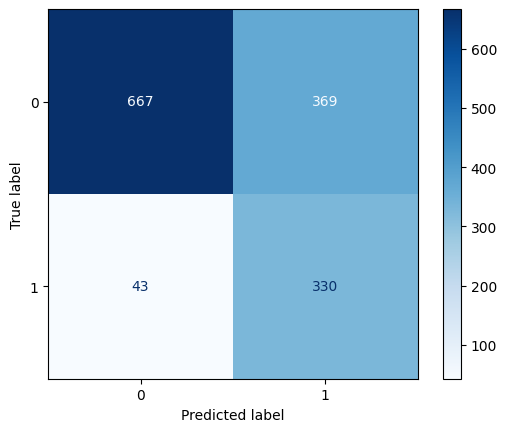

Model -->>  GaussianNB()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.7316336394393427
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.61      0.81      0.69      3137
           1       0.85      0.69      0.76      5139

    accuracy                           0.73      8276
   macro avg       0.73      0.75      0.73      8276
weighted avg       0.76      0.73      0.74      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.6763662171753017
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.61      0.93      0.73       674
           1       0.87      0.44      0.59       735

    accuracy                           0.68      1409
   macro avg       0.74      0.69      0.66      1409
weighted avg       0.75      0.68      0.66      1409



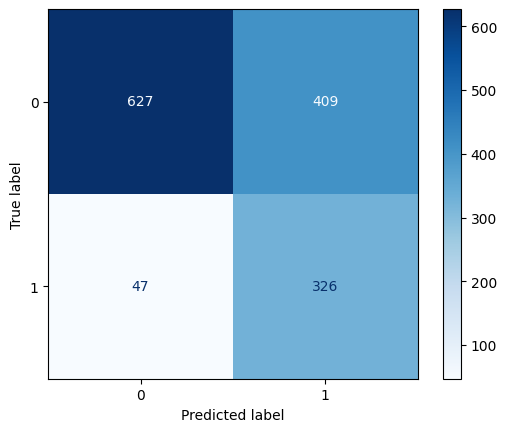

Model -->>  SVC()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.7597873368777187
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.65      0.84      0.73      3196
           1       0.87      0.71      0.78      5080

    accuracy                           0.76      8276
   macro avg       0.76      0.77      0.76      8276
weighted avg       0.79      0.76      0.76      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7047551454932577
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       706
           1       0.88      0.47      0.61       703

    accuracy                           0.70      1409
   macro avg       0.76      0.70      0.69      1409
weighted avg       0.76      0.70      0.69      1409



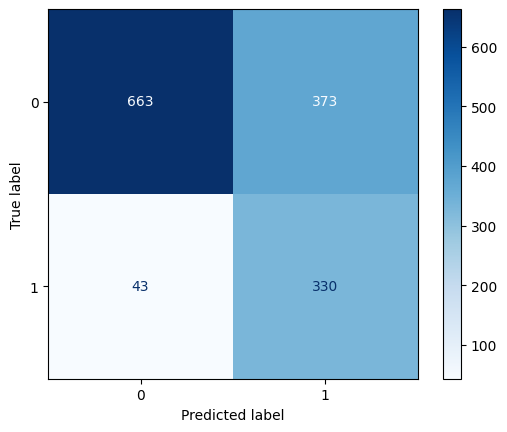

Model -->>  DecisionTreeClassifier()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.9968583856935718
Classification Report on Train Data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4154
           1       0.99      1.00      1.00      4122

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7033356990773598
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       950
           1       0.55      0.45      0.50       459

    accuracy                           0.70      1409
   macro avg       0.66      0.64      0.64      1409
weighted avg       0.69      0.70      0.69      140

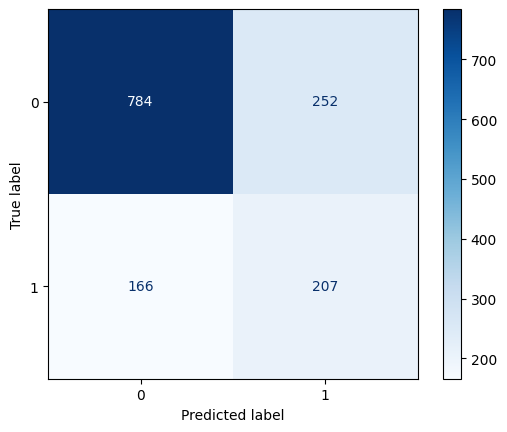

Model -->>  RandomForestClassifier()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.9966167230546158
Classification Report on Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      4146

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7374024130589071
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.79      0.85      0.81       964
           1       0.60      0.50      0.55       445

    accuracy                           0.74      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.73      0.74      0.73      140

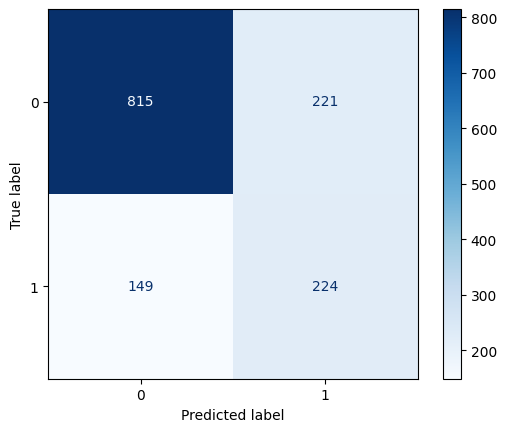

Model -->>  AdaBoostClassifier()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.736104398260029
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      3514
           1       0.81      0.71      0.75      4762

    accuracy                           0.74      8276
   macro avg       0.74      0.74      0.73      8276
weighted avg       0.75      0.74      0.74      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7139815471965933
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.67      0.92      0.77       755
           1       0.84      0.48      0.61       654

    accuracy                           0.71      1409
   macro avg       0.75      0.70      0.69      1409
weighted avg       0.75      0.71      0.70      1409



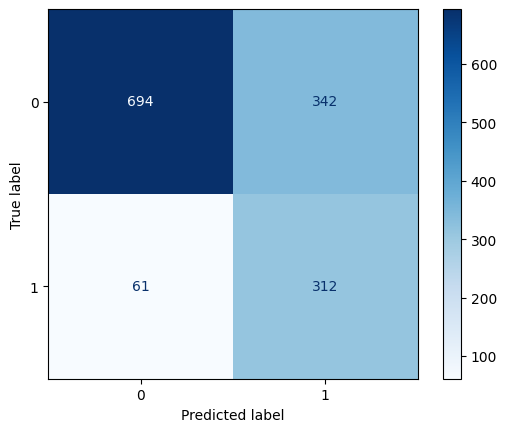

Model -->>  GradientBoostingClassifier()

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.7897535041082648
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      3536
           1       0.86      0.75      0.80      4740

    accuracy                           0.79      8276
   macro avg       0.79      0.80      0.79      8276
weighted avg       0.80      0.79      0.79      8276

----------------------------------------
Model Performance on Test Data 
Accuracy Score on Test Data -- >>  0.7338537970191625
Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       779
           1       0.84      0.50      0.63       630

    accuracy                           0.73      1409
   macro avg       0.77      0.71      0.71      1409
weighted avg       0.76      0.73      0.72     

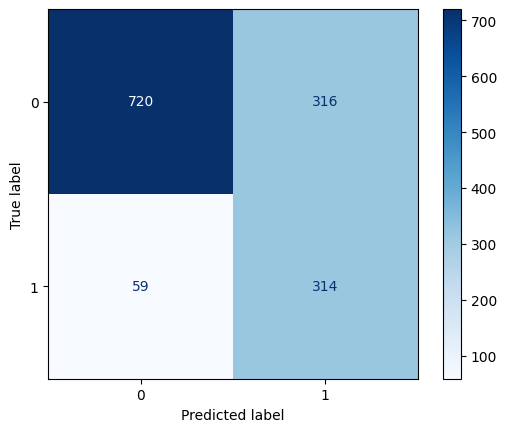

Model -->>  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model Train Succesfully

Model Performance on Train Data 
Accuracy Score on Train Data -- >>  0.8786853552440793
Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.83  

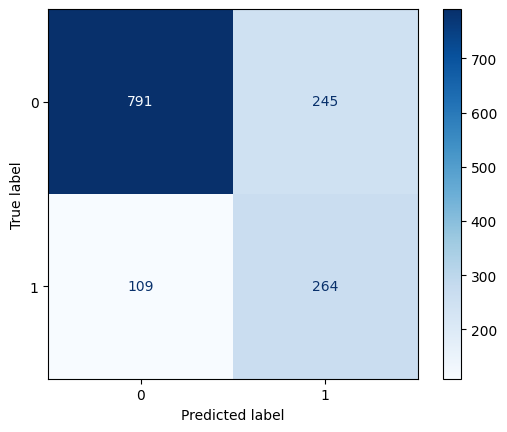

In [35]:
model_train_evaluation(model_lr)
model_train_evaluation(model_gnb)
model_train_evaluation(model_svm)
model_train_evaluation(model_dt)
model_train_evaluation(model_rf)
model_train_evaluation(model_ab)
model_train_evaluation(model_gb)
model_train_evaluation(model_xgb)


**HyperParameter tunning on Logistic regession**

In [36]:
params = {
    'penalty': ['l1', 'l2'],  # Simplified penalties
    'C': [0.1, 1.0, 10],      # Fewer values for regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Remove 'saga' unless using elasticnet
    'class_weight': ['balanced'],  # Keep this if data is imbalanced
    'max_iter': [100, 500],    # Fewer options for iterations
    'random_state': [42],      # Fix random state
}


In [37]:
from sklearn.model_selection import RandomizedSearchCV
lr_hp = LogisticRegression()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
random_search = RandomizedSearchCV(
    estimator=lr_hp,
    param_distributions=params,
    n_iter=100,
    scoring='recall',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Parameters: {'solver': 'liblinear', 'random_state': 42, 'penalty': 'l1', 'max_iter': 100, 'class_weight': 'balanced', 'C': 1.0}
Best Recall Score: 0.8627488299039376


              precision    recall  f1-score   support

           0       0.64      0.82      0.72      3250
           1       0.86      0.71      0.78      5026

    accuracy                           0.75      8276
   macro avg       0.75      0.76      0.75      8276
weighted avg       0.77      0.75      0.75      8276

[[2666 1472]
 [ 584 3554]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       709
           1       0.89      0.47      0.62       700

    accuracy                           0.71      1409
   macro avg       0.77      0.71      0.69      1409
weighted avg       0.76      0.71      0.69      1409

[[667 369]
 [ 42 331]]


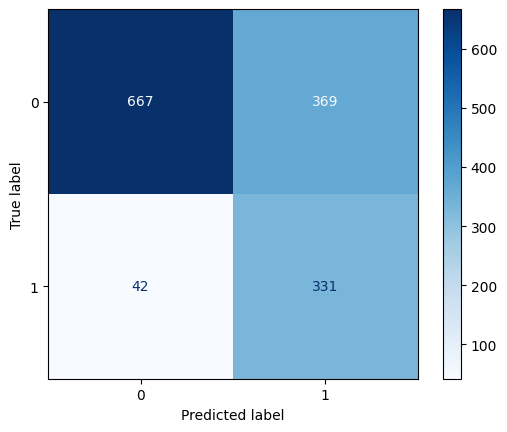

In [38]:
train_pred_gs = random_search.predict(x_train)
test_pred_gs = random_search.predict(x_test)

train_score = classification_report(train_pred_gs,y_train)
test_score = classification_report(test_pred_gs,y_test)
print(train_score)
print(confusion_matrix(y_train,train_pred_gs))
print('=='*20)
print(test_score)
print(confusion_matrix(y_test,test_pred_gs))

cm = confusion_matrix(y_test,test_pred_gs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [39]:
lr = LogisticRegression(
    solver= 'lbfgs', random_state= 42, penalty= 'l2',
    max_iter= 100, class_weight= 'balanced', C= 1.0
)
lr.fit(x_train,y_train)

train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

train_score = classification_report(train_pred,y_train)
test_score = classification_report(test_pred,y_test)
print(train_score)
print('=='*20)
print(test_score)

              precision    recall  f1-score   support

           0       0.65      0.82      0.72      3257
           1       0.86      0.71      0.78      5019

    accuracy                           0.75      8276
   macro avg       0.75      0.76      0.75      8276
weighted avg       0.77      0.75      0.76      8276

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       710
           1       0.88      0.47      0.62       699

    accuracy                           0.71      1409
   macro avg       0.76      0.71      0.69      1409
weighted avg       0.76      0.71      0.69      1409



**XGBoost HyperParameter Tunning**

In [40]:
# params_xgb = {
#     'objective': ['binary:logistic'],
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'max_depth': [3, 5, 7, 10],
#     'n_estimators': [50, 100, 200],
#     'min_child_weight': [1, 5, 10],
#     'gamma': [0, 0.1, 0.5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 2, 3],
#     'scale_pos_weight': [1, 10, 25],
#     'random_state': [42],

# }



# xgb = XGBClassifier()

# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=params_xgb,
#     n_iter=100,
#     scoring='recall',
#     cv=cv,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42,
# )
# random_search.fit(x_train, y_train)

# print("Best Parameters:", random_search.best_params_)
# print("Best Recall Score:", random_search.best_score_)


# # Make predictions on the training and test sets

# train_pred = random_search.predict(x_train)
# test_pred = random_search.predict(x_test)

# # Generate classification reports for train and test sets
# train_score = classification_report(y_train, train_pred)
# test_score = classification_report(y_test, test_pred)

# # Print the classification reports
# print("Training Classification Report:")
# print(train_score)
# print('='*40)
# print("Testing Classification Report:")
# print(test_score)



**Adjusting  parameters of xgb**

Training roc_auc_score -->>  0.7855244079265344
Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      4138
           1       0.75      0.87      0.80      4138

    accuracy                           0.79      8276
   macro avg       0.79      0.79      0.78      8276
weighted avg       0.79      0.79      0.78      8276

Test roc_auc_score -->>  0.7675970685354063
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1036
           1       0.49      0.85      0.62       373

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.73      0.74      1409



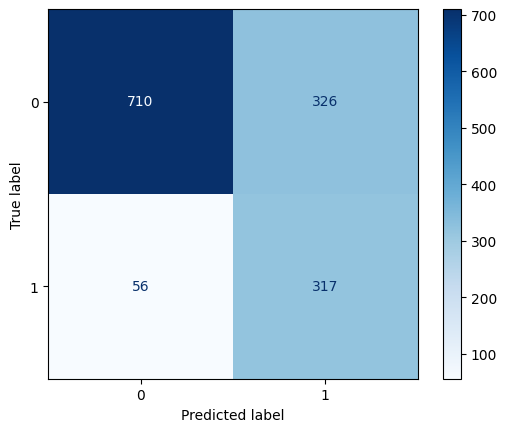

In [41]:
xgb_s = XGBClassifier(
    subsample=0.8,
    scale_pos_weight=1,
    reg_lambda=3,
    reg_alpha=1,
    random_state=42,
    objective='binary:logistic',
    n_estimators=50,
    min_child_weight=10,
    max_depth=5,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.8,
)

# Fit the model on the training data
xgb_s.fit(x_train, y_train)

# Make predictions on the training and test sets
train_pred = xgb_s.predict(x_train)
test_pred = xgb_s.predict(x_test)

train_score = roc_auc_score(y_train, train_pred)
test_score = roc_auc_score(y_test, test_pred)

# Generate classification reports for train and test sets
train_report = classification_report(y_train, train_pred)
test_report = classification_report(y_test, test_pred)

# Print the classification reports
print("Training roc_auc_score -->> ", train_score)
print("Training Classification Report:")
print(train_report)
print('='*40)

print("Test roc_auc_score -->> ", test_score)
print("Testing Classification Report:")
print(test_report)

cm = confusion_matrix(y_test,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [42]:
train_auc = roc_auc_score(y_train, xgb_s.predict_proba(x_train)[:, 1])
test_auc = roc_auc_score(y_test, xgb_s.predict_proba(x_test)[:, 1])

print("Train AUC:", train_auc)
print("Test AUC:", test_auc)


Train AUC: 0.8673122606003933
Test AUC: 0.8471371122175411


# **Conclusion**

The XGBClassifier performed effectively, achieving a balance between precision and recall across both classes, while demonstrating resilience against overfitting. Below is a detailed evaluation of the model's performance:

**Training Results**


*  ROC AUC Score: 0.7855
**Classification Report:**

**Class 0 (Non-churn):**

*  Precision: 0.84

*  Recall: 0.71

*  F1-Score: 0.77

*  Support: 4,138

**Class 1 (Churn):**

*  Precision: 0.75

*  Recall: 0.87

* F1-Score: 0.80

*Support: 4,138


**Testing Results**

*  ROC AUC Score: 0.7676

**Classification Report:**

**Class 0 (Non-churn):**

*  Precision: 0.93

*  Recall: 0.69

*  F1-Score: 0.79

*  Support: 1,036

**Class 1 (Churn):**

*  Precision: 0.49

*  Recall: 0.85

*  F1-Score: 0.62

*  Support: 373

# **Save Model**

In [43]:
import pickle

# Save the model
pickle.dump(xgb_s, open("tele_customer_churn_model.pkl", "wb"))

# Load the model
telco_cus_churn_pred_model = pickle.load(open("tele_customer_churn_model.pkl", "rb"))

# Check if the model is loaded correctly
print("Model loaded successfully:", telco_cus_churn_pred_model)


Model loaded successfully: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
